# More Dimensionality Reduction

Heute betrachten wir noch weitere Dimensionsreduktionsverfahren. 

In [1]:
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print(X_train.shape)

(55000, 28, 28)


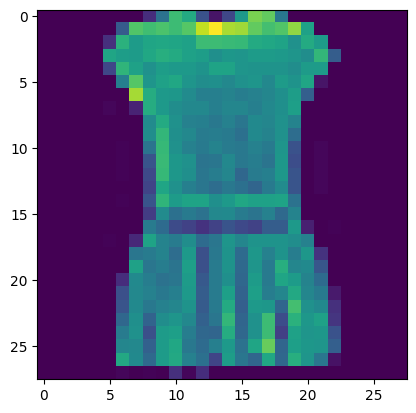

In [3]:
plt.imshow(X_train[3])

## PCA zur Kompression und Visualisierung der Dimensionsreduktion

In [4]:
print(X_train.shape)
flat_train = X_train.reshape(-1, 28*28)

print(flat_train.shape)

(55000, 28, 28)
(55000, 784)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  # Wir wollen soviele Merkmale, bis wir 95% erklärte Varianz haben
X_reduced = pca.fit_transform(flat_train, y_train)

In [6]:
print(X_reduced.shape)

X_recovered = pca.inverse_transform(X_reduced)
print(X_recovered.shape)

(55000, 187)
(55000, 784)


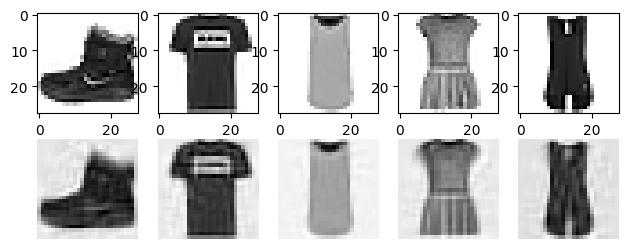

In [7]:
n_images=5
fig = plt.figure(figsize=(n_images * 1.5, 3))
for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plt.imshow(flat_train[image_index].reshape(28,28), cmap="binary")
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(X_recovered[image_index].reshape(28,28),cmap="binary")
    plt.axis("off")

## Stacked Autoencoders

In [102]:
tf.random.set_seed(42)
np.random.seed(42)

In [103]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

In [104]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [105]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [106]:
stacked_ae.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam())

history=stacked_ae.fit(X_train, X_train,epochs=20, validation_data=(X_valid,X_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3072 - val_loss: 0.2923
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2868 - val_loss: 0.2862
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2827 - val_loss: 0.2834
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2807 - val_loss: 0.2818
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2794 - val_loss: 0.2805
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2784 - val_loss: 0.2800
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2776 - val_loss: 0.2793
Epoch 8/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2770 - val_loss: 0.2784
Epoch 9/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2765 - val_loss: 0.2784
Epoch 10/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.276

### Rekonstruktion

In [107]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index],cmap="binary")
        plt.axis("off")

1/1 [==============================] - 0s 32ms/step


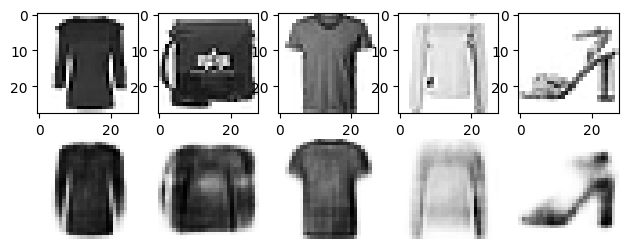

In [108]:
show_reconstructions(stacked_ae)

### 2D-Encoding zur Visualisierung

In [15]:
stacked_encoder2d = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(2, activation="selu"),
])
stacked_decoder2d = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu",input_shape=[2]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [16]:
stacked_2d = keras.models.Sequential([stacked_encoder2d, stacked_decoder2d])
stacked_2d.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=['accuracy'])

In [17]:
history = stacked_2d.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3951 - accuracy: 0.0667 - val_loss: 0.3564 - val_accuracy: 0.0803
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.0857 - val_loss: 0.3451 - val_accuracy: 0.0891
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3424 - accuracy: 0.0952 - val_loss: 0.3448 - val_accuracy: 0.0996
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.0957 - val_loss: 0.3399 - val_accuracy: 0.0907
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3363 - accuracy: 0.0944 - val_loss: 0.3380 - val_accuracy: 0.0842
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3346 - accuracy: 0.0950 - val_loss: 0.3349 - val_accuracy: 0.0952
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.0971 - val_loss: 0.3370 - val_accuracy:

1/1 [==============================] - 0s 24ms/step


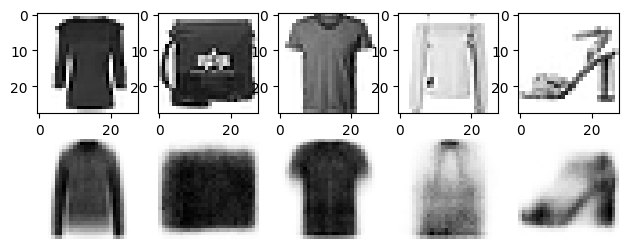

In [18]:
show_reconstructions(stacked_2d)

In [19]:
codings = stacked_encoder2d.predict(X_valid)

157/157 [==============================] - 0s 318us/step


In [20]:
print(codings.shape)

(5000, 2)


/var/folders/pb/9z396mvn5h50lm97gx3bv0j00000gn/T/ipykernel_48496/569604185.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


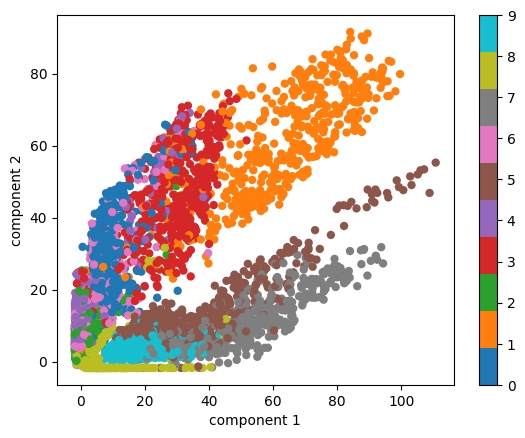

In [21]:
plt.scatter(codings[:, 0], codings[:, 1],
            c=y_valid, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1',size=10)
plt.ylabel('component 2')
plt.colorbar()

In [22]:
codings = stacked_encoder.predict(X_valid)
print(codings.shape)

157/157 [==============================] - 0s 332us/step
(5000, 30)




|Label | Class|
| :- | -: |
|0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 |Shirt |
| 7 |Sneaker |
| 8 | Bag |
| 9 |Ankle boot |

157/157 [==============================] - 0s 330us/step


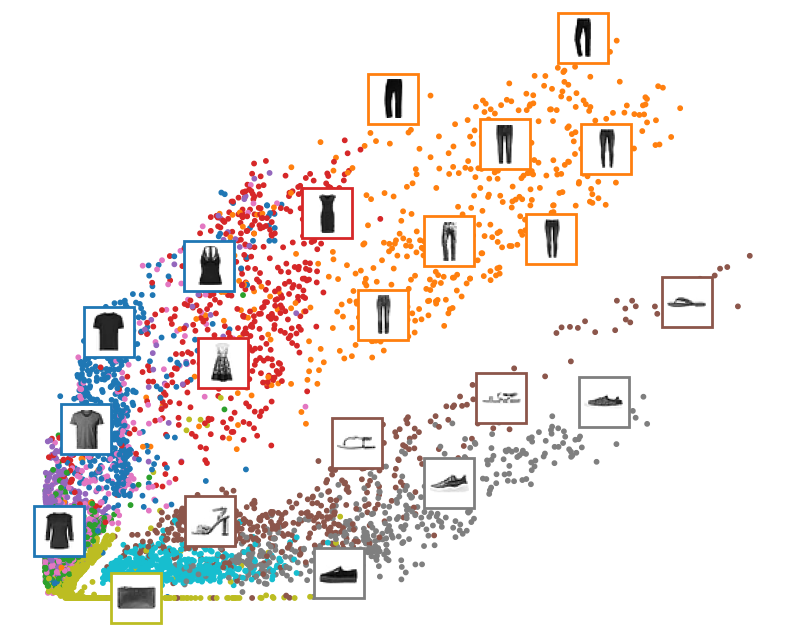

In [23]:
codings = stacked_encoder2d.predict(X_valid)

# extra code – beautifies the previous diagram for the book

import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = codings
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.show()

## Alternative: Plot with t-SNE

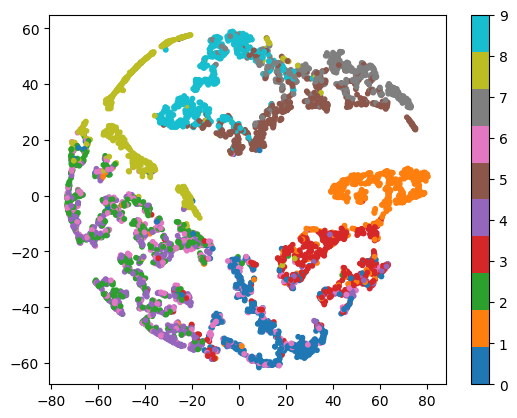

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)

X_valid_plot = tsne.fit_transform(codings)

plt.scatter(X_valid_plot[:,0], X_valid_plot[:,1], c=y_valid,s=10, cmap='tab10')
plt.colorbar()

## Convolutional Autoencoder

In [25]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2,  activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [26]:
print("Convolutional Encoder")
print(conv_encoder.summary())

print("Convolutional Decoder")

print(conv_decoder.summary())

Convolutional Encoder
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (No

In [27]:
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics="accuracy")

In [28]:
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5722 - accuracy: 0.0778 - val_loss: 0.4613 - val_accuracy: 0.0990
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4007 - accuracy: 0.1195 - val_loss: 0.3766 - val_accuracy: 0.1235
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3644 - accuracy: 0.1349 - val_loss: 0.3571 - val_accuracy: 0.1388
Epoch 4/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3486 - accuracy: 0.1469 - val_loss: 0.3442 - val_accuracy: 0.1479
Epoch 5/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3374 - accuracy: 0.1540 - val_loss: 0.3348 - val_accuracy: 0.1528


1/1 [==============================] - 0s 65ms/step


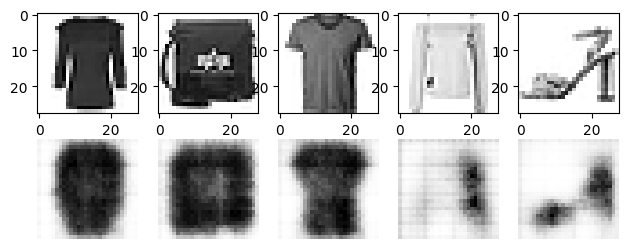

In [29]:
show_reconstructions(conv_ae)

## Denoising Autoencoder

In [30]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 [==============================] - 1s 0us/step


In [31]:
print(x_test_noisy.shape)

(10000, 28, 28, 1)


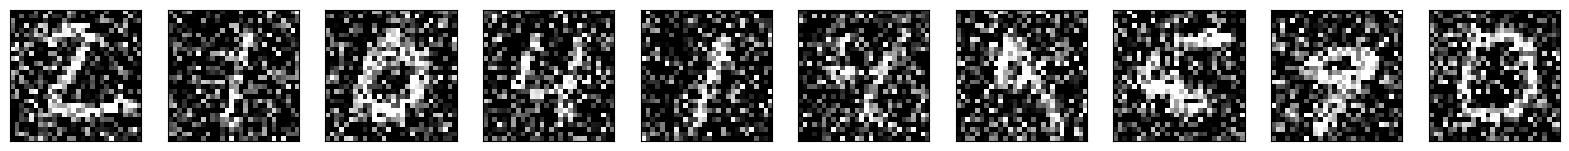

In [32]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
denoise_encoder = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
])

denoise_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
])

In [34]:
denoising_autoencoder = keras.models.Sequential([denoise_encoder, denoise_decoder])
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2353 - val_loss: 0.1289
Epoch 2/5
469/469 [==============================] - 16s 35ms/step - loss: 0.1244 - val_loss: 0.1187
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.1175 - val_loss: 0.1143
Epoch 4/5
469/469 [==============================] - 20s 42ms/step - loss: 0.1144 - val_loss: 0.1122
Epoch 5/5
469/469 [==============================] - 14s 30ms/step - loss: 0.1128 - val_loss: 0.1112


1/1 [==============================] - 0s 75ms/step


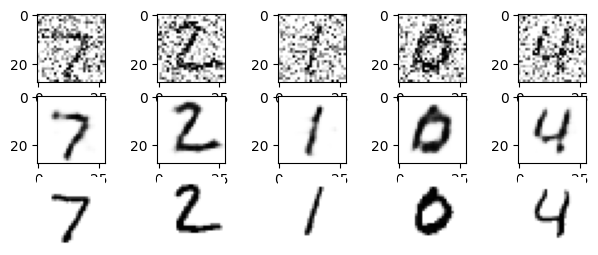

In [36]:
n_images=5
reconstructions = denoising_autoencoder.predict(x_test_noisy[:n_images])
fig = plt.figure(figsize=(n_images * 1.5, 3))
for image_index in range(n_images):
    plt.subplot(3, n_images, 1 + image_index)
    plt.imshow(x_test_noisy[image_index].reshape(28,28), cmap="binary")
    plt.subplot(3, n_images, 1 + n_images + image_index)
    plt.imshow(reconstructions[image_index].reshape(28,28),cmap="binary")
    plt.subplot(3, n_images, 1 + 2*n_images + image_index)
    plt.imshow(x_test[image_index].reshape(28,28),cmap="binary")
    plt.axis("off")

In [37]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    
])

In [38]:
autoencoder_do = keras.models.Sequential([dropout_encoder, dropout_decoder])
autoencoder_do.compile(optimizer='adam', loss='binary_crossentropy')

In [39]:
autoencoder_do.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1903 - val_loss: 0.1046
Epoch 2/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0985 - val_loss: 0.1194
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0940 - val_loss: 0.1345
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0917 - val_loss: 0.1522
Epoch 5/5
469/469 [==============================] - 13s 29ms/step - loss: 0.0902 - val_loss: 0.1653


1/1 [==============================] - 0s 19ms/step


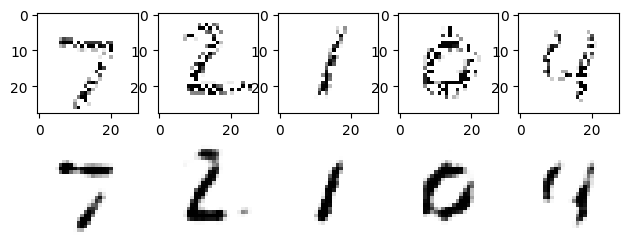

In [40]:
n_images=5

dropout = keras.layers.Dropout(0.5)

data=dropout(x_test[:n_images],training=True)

reconstructions = denoising_autoencoder.predict(data)
fig = plt.figure(figsize=(n_images * 1.5, 3))
for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plt.imshow(tf.reshape(data[image_index],shape=(28,28)), cmap="binary")
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(tf.reshape(reconstructions[image_index],shape=(28,28)),cmap="binary")
    plt.axis("off")

## Autoencoders zur Anomalieerkennung

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Download the dataset, see: https://www.tensorflow.org/tutorials/generative/autoencoder
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [62]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21)

In [63]:
#normalizing to [0,1]

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [74]:
#Normal ECG-data is labeled as 1, abnormal as -1 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

(2359, 140)


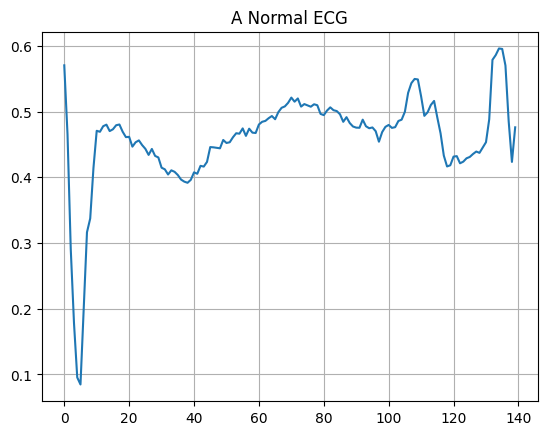

In [65]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = AnomalyDetector()

In [71]:
autoencoder.compile(optimizer='adam', loss='mae')

In [72]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0591 - val_loss: 0.0535
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 0.0519
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.0503
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.0486
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.0471
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.0451
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.0430
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0416
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.0403
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.0390
Epoch 11/20
5/5 [=====================

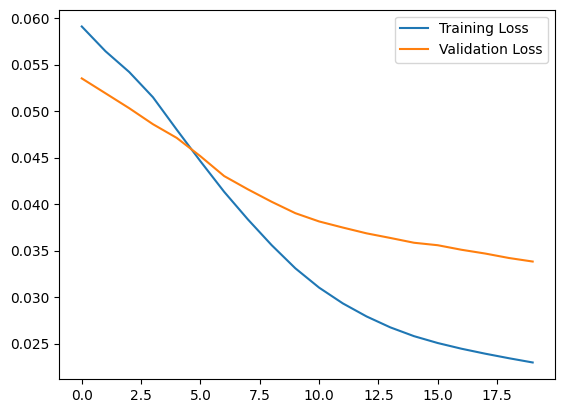

In [73]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

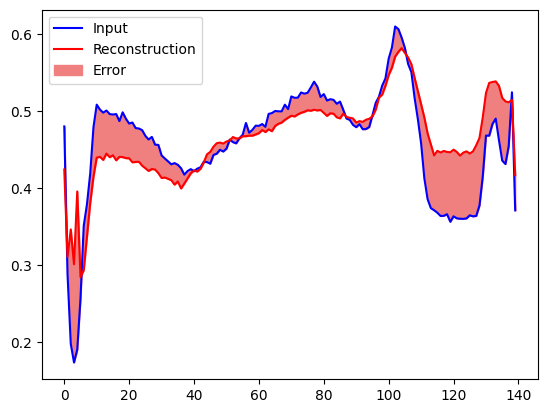

In [75]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

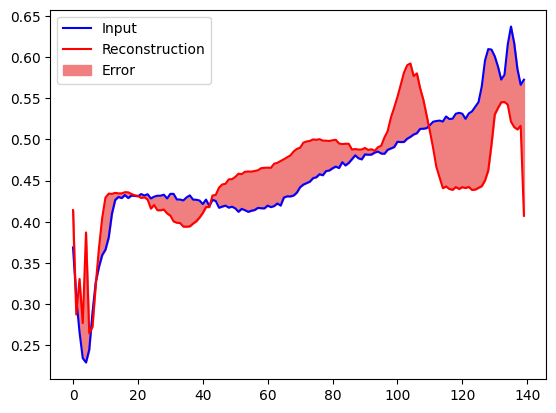

In [76]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 329us/step


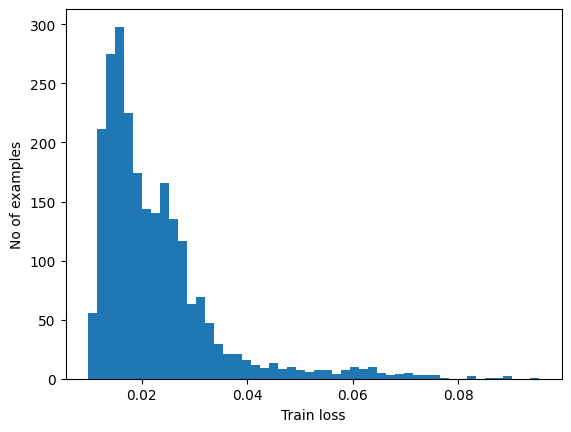

In [77]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [78]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03408284


14/14 [==============================] - 0s 487us/step


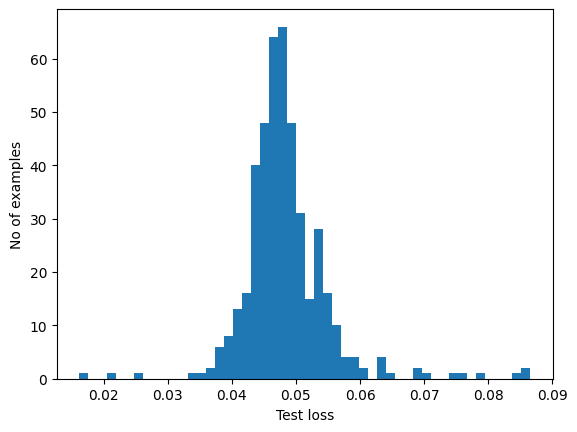

In [79]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [85]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9941176470588236
Recall = 0.9053571428571429


## Variational Autoencoder

In [41]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return keras.backend.random_normal(tf.shape(log_var)) * keras.backend.exp(log_var / 2) + mean 

In [42]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)  
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * keras.backend.sum(
    1 + codings_log_var - keras.backend.exp(codings_log_var) - keras.backend.square(codings_mean),
    axis=-1) #summe ueber alle instanzen
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics="accuracy")

variational_ae.add_loss(keras.backend.mean(latent_loss) / 784.) #scaling, da reconstruction loss mean entspricht
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3896 - accuracy: 0.0761 - val_loss: 0.3512 - val_accuracy: 0.0907
Epoch 2/25
430/430 [==============================] - 2s 6ms/step - loss: 0.3433 - accuracy: 0.0943 - val_loss: 0.3359 - val_accuracy: 0.0906
Epoch 3/25
430/430 [==============================] - 2s 6ms/step - loss: 0.3333 - accuracy: 0.1018 - val_loss: 0.3367 - val_accuracy: 0.1037
Epoch 4/25
430/430 [==============================] - 2s 6ms/step - loss: 0.3281 - accuracy: 0.1092 - val_loss: 0.3263 - val_accuracy: 0.1104
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 0.3248 - accuracy: 0.1137 - val_loss: 0.3286 - val_accuracy: 0.1121
Epoch 6/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3225 - accuracy: 0.1175 - val_loss: 0.3262 - val_accuracy: 0.1133
Epoch 7/25
430/430 [==============================] - 5s 11ms/step - loss: 0.3207 - accuracy: 0.1217 - val_loss: 0.3235 - val_accuracy: 0.1257
Epoch

1/1 [==============================] - 0s 96ms/step


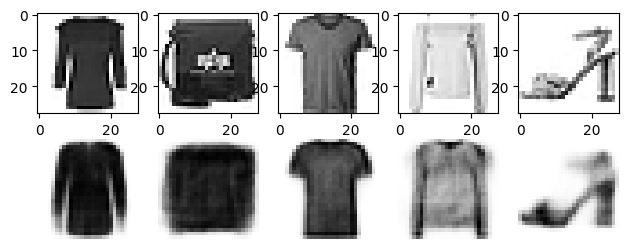

In [43]:
show_reconstructions(variational_ae)

### Erzeugen von Bildern



In [44]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

(12, 10)


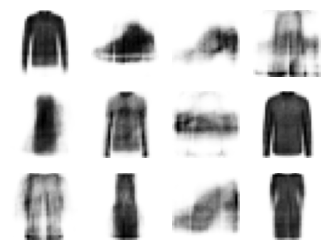

In [45]:
tf.random.set_seed(42)
codings_size = 10
codings = tf.random.normal(shape=[12, codings_size])

print(codings.shape)
images = variational_decoder(codings)
plot_multiple_images(images, 4)